<a href="https://colab.research.google.com/github/Jaya9522/almabetter_assignments/blob/main/Guided_Project_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b>Gradient Descent for Optimization </b>

## <b><u>Introduction

### Gradient descent is an algorithm used to the find local minima of any differentiable function. More formally, given a differentiable function $f(x),$ the gradient descent algorithms helps us compute $x^*$ such that $f'(x^*) = 0$ and $x^*$ is a minimum of $f(x).$ A function can have many local minima $x_{1}^{*}, x_{2}^{*}, \ldots, x_{k}^{*},$ the gradient descent algorithm will converge to one of them depending on the its starting position and learning rate (discussed below). 

### The name "Gradient Descent" hints at how this algorithm works. The algorithms requires 1) knowing the $\textbf{gradient}$ (partial derivatives) of the function and 2) using the gradient to determine the direction of steepest $\textbf{descent}.$ The idea is that we will begin somewhere on the function, for example $f(x_{1})$, and then climb down the function as quickly as possible towards the first valley (local minimum) where $f'(x^*) = 0.$ The gradient descent algorithm essentially describes the sequence of steps to take to go from $x_{1}$ to a local minimum $x^*.$

### Gradient descent (or a variation) is very commonly used to train machine learning models by minimizing some objective function. Many of the objective functions in machine learning are hard to minimize analytically, but we can approximate the minimum using gradient descent. 

## <b><u>Algorithm intuition </u></b>

### Suppose we have a single variable function $f(x)$ that has a single global minimum (for example a parabola that opens upwards) at $x^*.$ Our goal is to approximate $x^*$ through an iterative algorithm. The first step is to pick a starting point (initial value) for the algorithm, $x_{1}.$ We will randomly guess $x_{1}$ and note that either $x_{1} < x^*$, or $x_{1} > x^*$ (we can get really lucky and have $x_{1} = x^*,$ but this is very unlikely). Since $x^*$ is the global minimum, we know that $f(x^*) < f(x_{1}),$ that is our starting point is above the minimum. Starting at $x_{1}$ we want to take a sequence of steps to get down to $x^*.$ The gradient descent algorithm characterizes the set of steps to take to get from $x_{1}$ down to $x^*.$

### Without loss of generality assume our starting position $x_{1} < x^*,$ and let us discuss how to get down towards $x^*.$ Recall that we can compute the gradient of $f(x)$ since we assume the function is differentiable. Suppose we find $f'(x_{1}) < 0,$ that indicates that if we take a step right to $x_{2} > x_{1}$ then we will move down the function since $f(x_{2}) < f(x_{1}).$ This is exactly what we want (moving down the function), so we want to take a step to the right of $x_{1}.$ But how large of a step should we take? Well it makes sense to say the step size will depend on the steepness of the descent. The steeper the descent at $x_{1}$, the larger the step size should be as it indicates we have a long way to go before getting to the minimum. More formally the step size will be proportional to the gradient at $x_{1}.$

### Once we get from $x_{1}$ to $x_{2}$, we repeat the same logic as above. Suppose $f'(x_2) < 0$ again, so we need to take a step towards $x_{3} > x_{2}$ to further go down the function. Again our step size will be proportional to $f'(x_2).$ Repeating this process will result in a sequence of steps $x_{1}, x_{2}, \ldots, x_{T}.$ For large values of $T$ we expect $x_{T} \approx x^*.$ The diagram below more formally describes the intuition behind gradient descent.

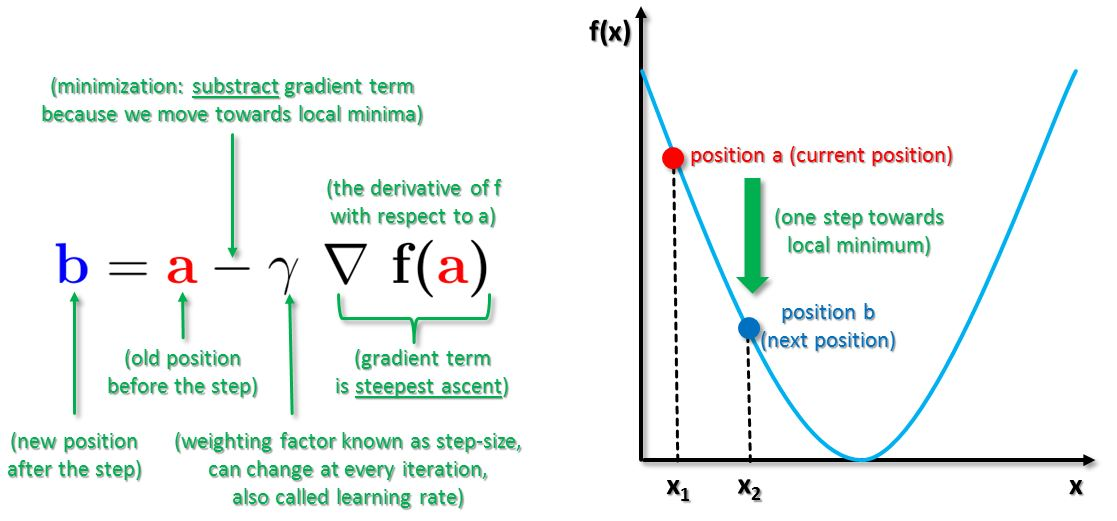

### The diagram above formally shows a single step of the gradient descent algorithm from $x_{1}$ to $x_{2}$ To determine $x_{2}$ we take a step to the right of $x_{1}$ that is proportional to $f'(x_{1}).$ Mathematically speaking, the sign of $f'(x_{1})$ indicates the direction of the steepest ascent at $x_{1}$ (magnitude of $f'(x_{1})$ is measure of steepness), but since we want to descend (its called gradient $\textbf{descent}$) we use $-f'(x_{1}).$ Gradient descent relies on a parameter $\lambda$ called the learning rate, let us talk about this more. 

### <b>Thinking about the learning rate </b>

### The learning rate $\lambda$ and the steepest descent $-f'(x_{1})$ together determine the step size towards the minimum. Hence the learning rate determines the size of the steps. If $\lambda$ is large then we will take large steps down towards to the minimum. Similarly if $\lambda$ is small it will take longer to converge towards the minimum as the step size is smaller. Does this mean we should pick a really large $\lambda$ to coverge fast towards $x^*?$ No, this is not a good idea. $\lambda$ too large or too small can cause covergence problems as illustrated by the diagram below.

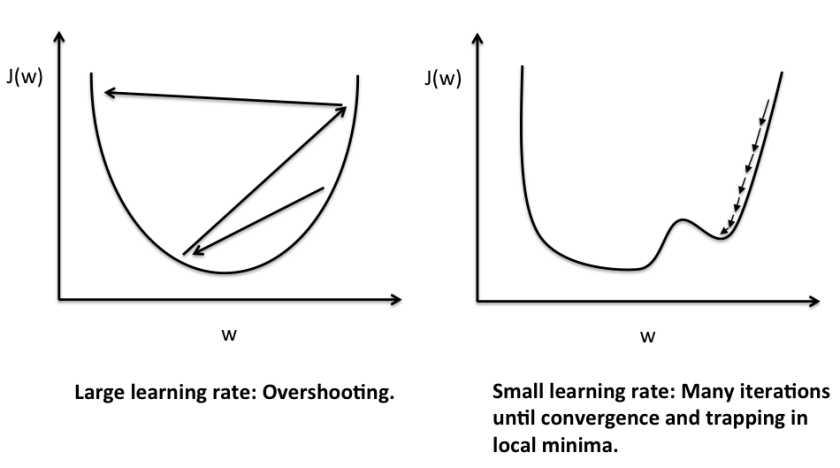

### Note that $J(w)$ is the function that we want to minimize in the above diagram. On the left figure $\lambda$ is very large which leads to taking very big steps. These big steps essentially have trouble locating the minimum because they are jumping over it. On the right figure $\lambda$ is very small leading to tiny steps towards the minimum. The algorithm finds a minimum, but its only a local minimum (global minimum is ideal). For the right figure imagine the step size was a bit larger, then the algorithm could jump over the local minimum and possiblly converge into the global minimum. 

### So how you do pick the best $\lambda$? This is often done using "cross validation" which will be discussed later on.

## <b><u>Gradient descent algorithm </u></b>

### <b>Single variable</b>

### Suppose we have a single variable and differentiable function $f(x).$ Given a initial value $x_{1}$ the gradient descent describes the steps required to coverge towards a local minimum $x^*$ such that $f'(x^*) = 0.$ In the above section we determined that $x_{2} = x_{1} - \lambda f'(x_{1}),$ where $\lambda$ is the learning rate parameter. This formula can be generalized to $$x_{t+1} = x_{t} - \lambda f'(x_{t}),$$ for iteration $t.$ Given initial value $x_{1}$ and large number of iterations $T,$ this algorithm will generate $x_{1}, x_{2}, \ldots, x_{T},$ where $x_{T} \approx x^*.$ That is $x_{t+1}$ converges towards $x^*$ as $t$ gets very large. Notice that at convergence $f'(x_{t}) \approx 0$ and hence $|x_{t+1} - x_{t}| \approx 0.$ Therefore a common stopping criteria for gradient descent is to iterate until $|x_{t+1} - x_{t}|$ is a very small number. For example we can keep iterating gradient descent until $|x_{t+1} - x_{t}| < 0.001.$

### <b>Multiple variables</b>
### Consider a multiple variable and differentiable function $f(x_{1},x_{2},\ldots, x_{n}).$ Our goal is to apply gradient descent and find a minimum $(x_{1}^{*}, x_{2}^{*}, \ldots, x_{n}^{*}).$ This function has partial derivatives stored in the gradient vector $(\frac{df(x)}{dx_{1}}, \ldots, \frac{df(x)}{dx_{n}}).$ The direction of the gradient vector indicates direction of steepest ascent, and the length of the gradient vector is a mesuare of the steepness. We can easily generalize the gradient descent to multiple variables as follows:


$$
\begin{bmatrix}
    x_{1}^{t+1} \\ 
    \vdots \\
    x_{n}^{t+1}
\end{bmatrix}
=
\begin{bmatrix}
    x_{1}^{t} \\ 
    \vdots \\
    x_{n}^{t}
\end{bmatrix}
-
\lambda
\begin{bmatrix}
    \frac{df(x_{1})}{dx_{1,t}} \\ 
    \vdots \\
    \frac{df(x_{n})}{dx_{n,t}} \\ 
\end{bmatrix},
$$
### where $t$ is the gradient descent itteration. Now the stopping criteria can depend on the euclidean distance between the now and previous itteration, that is stop if $\sqrt{(x_{1}^{t+1} - x_{1}^{t})^2 + \ldots + (x_{n}^{t+1} - x_{n}^{t})^2} < 0.001.$

## Example: Minimizing single variable function

### Consider the following single variable function $$f(x) = 0.1x^2 + sin(0.1x^2)$$ and suppose we find its minimum using gradient descent. Gradient descent requires us to compute the first derivative which is $$f'(x) = 0.2x + 0.2xcos(0.1x^2).$$ The plot for f(x) is shown below.

In [1]:
# Matrix computations
from numpy import *

# Plotting
from matplotlib.pyplot import *

# Change size of figures
fig_size = [9,7]
rcParams["figure.figsize"] = fig_size

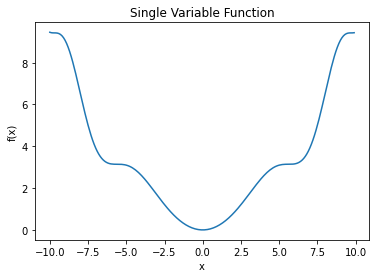

In [2]:
# Define function f(x)
def f(x):
    
    # f(x) = 0.1x^2 + sin(0.1x^2)
    return 0.1*x**2 + sin(0.1*x**2)

# Plot function on given range

# Second arguments allows for seperate points to be ploted on f(x)
def plotf(x, xdots, label):

    # Compute y-values
    y = f(x)

    # Plot (x, f(x))
    plot(x,y)
    xlabel("x")
    ylabel("f(x)")
    title(label)
    
    # Plot points on f(x)
    plot(xdots, f(xdots), 'bo')
    show()
    
# Plot f(x) from [-10,10]
x = arange(-10, 10, 0.1)
plotf(x, np.array([]), "Single Variable Function")

### Notice that f(x) has a global minimum at x = 0, but there are also seem to be two local minima near -5.5 and 5.5. Ideally we want to be able to start anywhere from [-10,10] and use gradient descent to go down towards the minimum of 0. We will see that finding the global minimum depends on initial starting point and learning rate. 

In [3]:
# Derivative of f(x) is f'(x) (denoted by df below)
# f'(x) = 0.2x + 0.2xcos(0.1x^2)
def derivative(x):
  return 0.2*x + 0.2*x*cos(0.1*x**2)

### Now that we have defined $f(x)$ and $f'(x)$, let us run gradient descent for different initial values and learning parameters and try to compute the global minimum. 

In [4]:
# Gradient Descent 
def grad_descent(derivative,x_prev,learning_rate):

  # Deciding when to stop the algorithm
  epsilon = 0.001

  # Iteration number
  grad_iter = 1

  # Gradient descent update step
  x_next = x_prev - learning_rate*derivative(x_prev)

  # Update the sequence where we store all the x_next
  sequence = np.array([])
  sequence = np.append(sequence,x_next)

  # Start my iteration 
  while abs(x_next - x_prev) > epsilon :

    # Setting x_prev to x_next
    x_prev = x_next

    # Updating x_next 
    x_next = x_prev - learning_rate*derivative(x_prev)

    # Update sequence
    sequence = np.append(sequence,x_next)

    # Update iteration
    grad_iter = grad_iter + 1


  return x_next,sequence,grad_iter

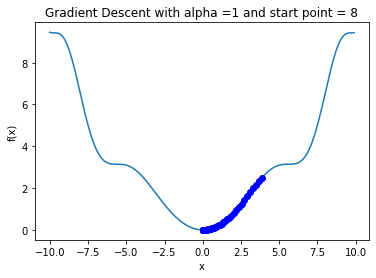

In [10]:
# Output vector (min x-value, (x_1,..,x_T)) from gradient descent

grad_output = grad_descent(derivative,4,0.2)
plotf(x,grad_output[1],"Gradient Descent with alpha =1 and start point = 8")

In [11]:
grad_output[1]

array([3.84467192, 3.67665766, 3.49763849, 3.31009509, 3.11712341,
       2.92212351, 2.72843783, 2.53903302, 2.35629386, 2.18194803,
       2.01709803, 1.86231686, 1.71776698, 1.58331523, 1.45862967,
       1.34325487, 1.23666674, 1.13831076, 1.0476276 , 0.96406953,
       0.88711041, 0.8162514 , 0.75102373, 0.6909896 , 0.63574193,
       0.58490335, 0.53812477, 0.49508381, 0.45548305, 0.41904833,
       0.38552705, 0.35468659, 0.32631278, 0.3002085 , 0.27619231,
       0.25409725, 0.23376968, 0.21506824, 0.19786288, 0.18203391,
       0.16747123, 0.15407356, 0.14174769, 0.13040789, 0.11997527,
       0.11037725, 0.10154707, 0.09342331, 0.08594945, 0.07907349,
       0.07274761, 0.0669278 , 0.06157358, 0.05664769, 0.05211588,
       0.04794661, 0.04411088, 0.04058201, 0.03733545, 0.03434861,
       0.03160072, 0.02907267, 0.02674685, 0.0246071 , 0.02263854,
       0.02082745, 0.01916126, 0.01762836, 0.01621809, 0.01492064,
       0.01372699, 0.01262883, 0.01161852, 0.01068904])

In [12]:
grad_output[2]

74

## Using a small learning rate

### The example below uses a smaller than ideal learning rate of $\lambda = 0.1.$ Not only does this increase the number of gradient descent itterations to 105, but the algorithm coverges to one of the local minima. 

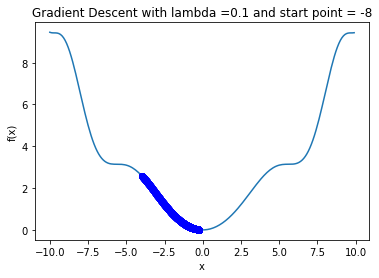

In [13]:
# Initial value x1 = -8 and learn rate lambda = 1
grad_output = grad_descent(derivative,-4,0.01)
plotf(x,grad_output[1],"Gradient Descent with lambda =0.1 and start point = -8")

In [14]:
grad_output[2]

745

## Small learning rate but starting close to global minimum

### The example below uses a small learning rate (for this context) of $\lambda = 0.1,$ but starts the algoirthm at $x_{1} = -5.$ The key point is that the initial value is now slight beyond the local minimum. Hence even with a small learning rate we are able to eventually converge to the global minimum.

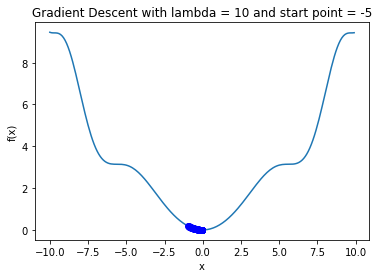

In [15]:
# Initial value x1 = -5 and learn rate lambda = 10

grad_output = grad_descent(derivative,-1,0.1)
plotf(x,grad_output[1],"Gradient Descent with lambda = 10 and start point = -5")

In [17]:
grad_output[2]

92

In [16]:
grad_output[1]

array([-0.96009992, -0.92177744, -0.88497285, -0.84962819, -0.81568732,
       -0.78309592, -0.75180152, -0.72175347, -0.69290292, -0.66520277,
       -0.63860768, -0.61307399, -0.58855969, -0.56502437, -0.54242915,
       -0.52073668, -0.49991104, -0.47991772, -0.46072356, -0.44229669,
       -0.42460652, -0.40762364, -0.39131982, -0.37566794, -0.36064197,
       -0.3462169 , -0.33236872, -0.31907438, -0.30631174, -0.29405954,
       -0.28229738, -0.27100566, -0.26016558, -0.24975908, -0.23976881,
       -0.23017814, -0.22097108, -0.21213229, -0.20364704, -0.19550119,
       -0.18768117, -0.18017395, -0.17296701, -0.16604834, -0.15940642,
       -0.15303018, -0.14690898, -0.14103263, -0.13539133, -0.12997568,
       -0.12477665, -0.11978559, -0.11499417, -0.1103944 , -0.10597863,
       -0.10173949, -0.09766991, -0.09376311, -0.09001259, -0.08641209,
       -0.0829556 , -0.07963738, -0.07645188, -0.07339381, -0.07045806,
       -0.06763974, -0.06493415, -0.06233678, -0.05984331, -0.05

## Initial value and learning rate are important

### From the above exercises of changing the initial value and learning rate we can conclude that gradient descent is not guaranteed to converge to the global minimum. Having a really low learning rate can make convergence slower (more iterations before finding minimum) and make it more likely to get stuck at local minima. A very high learning rate may be even more problematic as gradient descent may never converge (try $\lambda$ = 6 in the code). The initial value is also important for finding the global minimum. If we start close to the global minimum, we are more likely to find it in the above example even with a smaller than ideal learning rate.

### The diagram below shows even with multiple variables different initial values can lead to different local minima from gradient descent.

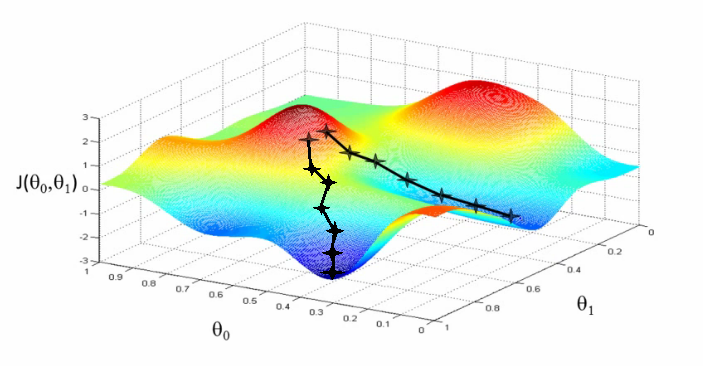

## Example: Minimizing multiple variable function

### Let us consider the following straight forward bivariate function $$f(x,y) = x^2 + y^2 + 1.$$ Since this a function of two variables, we have have the following partial derivatives $$\frac{df(x)}{dx} = f_{x} = 2x \text{ and } \frac{df(y)}{dy} = f_{y} = 2y.$$ Note that its easy to argue that the global minimum of $f(x,y)$ is (0,0) since $f(0,0) = 1$ and $f(x,y) \ge 1.$


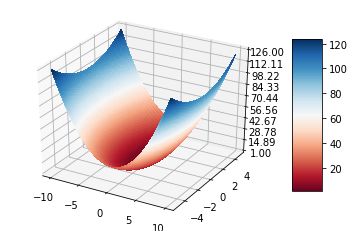

In [18]:
# Plotting in 3D
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

# f(x,y) = x^2 + y^2 + 1
def f(x,y):
    return x**2 + y**2 + 1

# (X,Y) grid on [-5,5]
y = arange(-5, 5, 0.25)
y = arange(-5, 5, 0.25)
X, Y = meshgrid(x, y)


# z = x^2 + y^2
Z = f(X,Y)

# Plot (X,Y) in 3D
fig = figure(1)
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.RdBu,linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf, shrink = 0.7, aspect=5)
show()

## Finding global minimum using gradient descent

### For this example the gradient descent algorithm is simplified to

$$
\begin{bmatrix}
    x^{t+1} \\ 
    y^{t+1}
\end{bmatrix}
=
\begin{bmatrix}
    x^{t} \\ 
    y^{t}
\end{bmatrix}
-
\lambda
\begin{bmatrix}
    2x^{t} \\ 
    2y^{t} \\ 
\end{bmatrix},
$$

### where $t$ is the gradient descent iteration. 

#  <b><u>Conclusion</u></b>

### Gradient descent is a first order (requires first derivative) optimization algorithm used to minimize a given objective function. The algorithm depends on the initial value and the learning rate. The idea behind gradient descent is that it takes a seqeuence of steps to go from the starting position to a local minimum. An initial value that is somewhat close to the global minimum is ideal. Too small a learning rate makes it more likely for the algorithm to get stuck at a local minimum. Whereas too high a learning rate makes it more likely that the algorithm will skip over the global minimum. As we discussed in this notebook, the gradient descent can be applied to any first differentiable function (single or multiple variabe) to approximate the minimums (can be local minimums) even if analytical ($f'(x) = 0$ solve for x) solutions are difficult.